<a href="https://colab.research.google.com/github/flydragon2018/Analytics_Vidhya/blob/master/fastai_v1_scene_classifier_96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Nov  4 11:27:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')##,force_remount=True)

Mounted at /content/drive


In [3]:
!unzip -q /content/drive/"My Drive"/Image_Classification.zip

In [4]:
!mkdir newtrain

In [5]:
!unzip -q /content/drive/"My Drive"/intelscenetrain.zip -d newtrain

In [6]:
!cp /content/drive/"My Drive"/all_train.csv .

In [7]:
!cp /content/drive/"My Drive"/mtrain.csv .

In [8]:
!cp /content/drive/"My Drive"/mtest.csv .

In [9]:
import numpy as np  
import pandas as pd  

from datetime import datetime
 
import os

In [10]:
!pip install fastai==1.0.61 -q

In [11]:
 
from fastai import *
from fastai.vision import *
from fastai.metrics import *

In [12]:
import fastai
fastai.__version__

'1.0.61'

In [13]:
#df=pd.read_csv("train.csv")
df=pd.read_csv("all_train.csv")
df.head()

,filename,label
0,0.jpg,buildings
1,10006.jpg,buildings
2,1001.jpg,buildings
3,10014.jpg,buildings
4,10018.jpg,buildings


In [14]:
import warnings
warnings.simplefilter("ignore")

In [17]:
fnlist=os.listdir('newtrain/train')
print(len(fnlist))

17034


In [18]:
 
#pictures_dir="./train"
pictures_dir="newtrain/train"
data = ImageDataBunch.from_df(
  df=df, path=pictures_dir, label_col='label', fn_col='filename',valid_pct=0.1, 
  ds_tfms=get_transforms(), size=224, bs=32).normalize(imagenet_stats)
 

In [ ]:
#learn = cnn_learner(data, models.resnet152, metrics=accuracy).mixup().to_fp16()

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


In [19]:
learn = cnn_learner(data, models.vgg16_bn, metrics=accuracy).mixup().to_fp16()

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


In [ ]:
#
#xresnext101, 0.72
#resnet50 85
#resnet101 88.75
#vgg16_bn     88.75
#vgg19_bn     87


In [20]:
learn.fit_one_cycle(30)

epoch,train_loss,valid_loss,accuracy,time
0,1.177975,0.327675,0.890194,02:20
1,1.015615,0.290132,0.899589,02:18
2,0.867235,0.291996,0.904874,02:21
3,0.805815,0.296409,0.894304,02:19
4,0.795210,0.281760,0.906048,02:20
5,0.767997,0.263131,0.913095,02:20
6,0.761271,0.233210,0.918967,02:20
7,0.751378,0.224606,0.926013,02:19
8,0.702413,0.230622,0.928362,02:20
9,0.705797,0.220435,0.930123,02:18


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


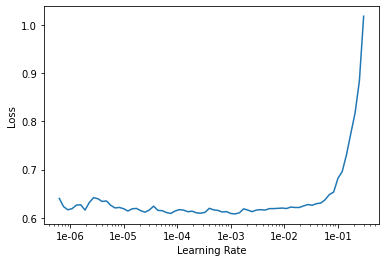

In [21]:
learn.lr_find()
learn.recorder.plot()


In [22]:
#learn.fine_tune(10)

In [23]:
learn.unfreeze()
learn.fit_one_cycle(30,max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.614635,0.194916,0.945978,02:33
1,0.606651,0.191870,0.945978,02:34
2,0.615704,0.195617,0.943629,02:32
3,0.602051,0.191256,0.943629,02:33
4,0.610212,0.188630,0.948326,02:32
5,0.598740,0.188969,0.946565,02:33
6,0.608437,0.188446,0.945978,02:32
7,0.612410,0.187232,0.945390,02:33
8,0.578661,0.184934,0.945978,02:33
9,0.610349,0.181900,0.947739,02:36


In [ ]:
learn.save('vgg16bn_95')

In [23]:
#learn = cnn_learner(data, models.vgg16_bn, metrics=[error_rate, accuracy], callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name='best_vgg16bn')]).load('vgg16bn_95')


In [ ]:
#learn.fit_one_cycle(6)

In [24]:
imgs=os.listdir("./test")

sub2=[]
pred2=[]
 
i=0
for imgname in imgs:
    i+=1
    n = imgname[:-4]
    print(n)
    
    img="./test/"+imgname
    p = PIL.Image.open(img).convert('RGB')
    t = pil2tensor(p, dtype=np.float32)
    t.div_(255)
    im = Image(t)
    pred2 = learn.predict(im)
    print(pred2[0])

    
     
    sub2.append([n,pred2[0]])
     

    #if i==10:
    #  break

    
df2=pd.DataFrame(sub2)
 
df2[[0]]=df2[[0]].astype(int)
 

df2.sort_values(by=[0],inplace=True,ascending=True)

dt=datetime.now()
df2.to_csv("scene_vggbn_{}.csv".format(dt.strftime("%m%d%H")),index=None,header=None)

Streaming output truncated to the last 5000 lines.
forest
438
mountain
3223
forest
1766
sea
1854
forest
790
sea
1372
forest
778
buildings
2229
glacier
230
forest
1810
sea
2102
mountain
1715
glacier
3386
glacier
2883
glacier
2768
mountain
3154
mountain
570
street
1623
mountain
618
mountain
3062
street
2491
sea
2361
street
1114
glacier
1103
forest
2875
street
603
forest
1900
forest
1703
street
1677
glacier
466
buildings
2145
forest
3378
glacier
424
glacier
416
forest
94
forest
1482
street
1986
glacier
2121
street
918
sea
601
buildings
839
forest
1327
forest
1018
mountain
330
sea
3288
sea
900
sea
2220
buildings
476
mountain
160
buildings
329
mountain
2547
forest
1144
forest
3293
buildings
2953
glacier
3107
sea
2838
forest
3279
buildings
714
glacier
2081
sea
2544
street
1433
mountain
1240
mountain
810
forest
9
sea
861
street
2405
forest
816
glacier
128
street
1756
street
2317
glacier
1569
forest
518
sea
1936
street
362
street
1793
glacier
919
mountain
1807
forest
357
forest
1002
mountain
1

In [25]:
!cp *.csv   /content/drive/"My Drive"/ 